### Download and clean adverse events table

In [1]:
# Import necessary packages:

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create adverse events tables

In [3]:
depression_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Depression Notebooks/depression_clean_df.csv")
depression_df['disease_type'] = "Depression"
anxiety_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Anxiety Notebooks/anxiety_clean_df.csv")
anxiety_df['disease_type'] = "Anxiety"
bipolar_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Bipolar Notebooks/bipolar_clean_df.csv")
bipolar_df['disease_type'] = "Bipolar"
alzheimers_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Alzheimer's Disease Notebook/alzheimers_clean_df.csv")
alzheimers_df['disease_type'] = "Alzheimer's Disease"
parkinsons_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Parkinson's Disease Notebooks/parkinsons_clean_df.csv")
parkinsons_df['disease_type'] = "Parkinson's Disease"
als_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Amyotrophic Lateral Sclerosis (ALS) Notebooks/als_clean_df.csv")
als_df['disease_type'] = "Amyotrophic lateral sclerosis"

In [4]:
# concat all clean dfs tp get master_df
frames = [depression_df, anxiety_df, bipolar_df, alzheimers_df, parkinsons_df, als_df]
master = pd.concat(frames)

#drop first column of no data 
all_disease_df = master.iloc[: , 1:]

In [5]:
all_disease_df['disease_type']

0                        Depression
1                        Depression
2                        Depression
3                        Depression
4                        Depression
                  ...              
44    Amyotrophic lateral sclerosis
45    Amyotrophic lateral sclerosis
46    Amyotrophic lateral sclerosis
47    Amyotrophic lateral sclerosis
48    Amyotrophic lateral sclerosis
Name: disease_type, Length: 1359, dtype: object

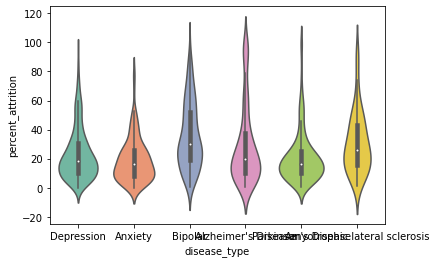

In [6]:
#ax = sns.violinplot(x="disease_type", y="percent_attrition", data=all_disease_df)
#sns.color_palette("husl", 8)
sns.violinplot(x="disease_type", y="percent_attrition", data=all_disease_df, palette="Set2")

In [7]:
depression_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Depression Notebooks/depression_clean_df.csv")
depression_df['disease_type'] = "Combined Neuropsychiatric Trials"
anxiety_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Anxiety Notebooks/anxiety_clean_df.csv")
anxiety_df['disease_type'] = "Combined Neuropsychiatric Trials"
bipolar_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Bipolar Notebooks/bipolar_clean_df.csv")
bipolar_df['disease_type'] = "Combined Neuropsychiatric Trials"
alzheimers_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Alzheimer's Disease Notebook/alzheimers_clean_df.csv")
alzheimers_df['disease_type'] = "Combined Neuropsychiatric Trials"
parkinsons_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Parkinson's Disease Notebooks/parkinsons_clean_df.csv")
parkinsons_df['disease_type'] = "Combined Neuropsychiatric Trials"
als_df = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Amyotrophic Lateral Sclerosis (ALS) Notebooks/als_clean_df.csv")
als_df['disease_type'] = "Combined Neuropsychiatric Trials"

# concat all clean dfs tp get master_df
master_frame = [depression_df, anxiety_df, bipolar_df, alzheimers_df, parkinsons_df, als_df]
master_master = pd.concat(master_frame)

#drop first column of no data 
master_df = master_master.iloc[: , 1:]

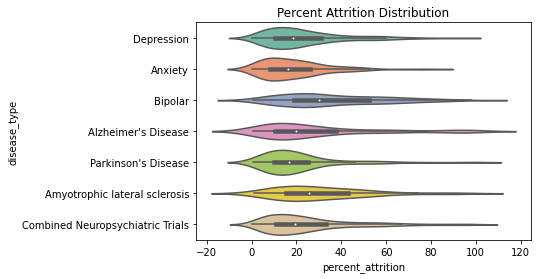

In [8]:
violin_frames = [all_disease_df, master_df]
full_violin_df = pd.concat(violin_frames)

ax = sns.violinplot(x="percent_attrition", y="disease_type", main = "Distribution of Percent Attrition across and between Neuropsychiatric Trials", data=full_violin_df, palette="Set2").set(title='Percent Attrition Distribution')

#save violin plot 
import matplotlib.pyplot as plt
plt.savefig("ax.jpg")

In [9]:
full_violin_df

,nct_id,enrollment_total,drop_count_total,study_type,study_phase,number_of_arms,has_expanded_access,has_dmc,number_of_facilities,study_duration_months,...,Dietary Supplement,Genetic,Drug,Biological,percent_attrition,event_type_deaths,event_type_other,event_type_serious,quantile_attrition_range,disease_type
0,NCT03315208,56.0,19.0,Interventional,Not Applicable,2.0,False,True,1.0,22.0,...,0,0,0,0,33.928571,0.0,21.0,9.0,75-100Q,Depression
1,NCT00574145,44.0,3.0,Interventional,Not Applicable,2.0,False,True,3.0,26.0,...,0,0,0,0,6.818182,0.0,0.0,0.0,0-25Q,Depression
2,NCT01973283,100.0,4.0,Interventional,Phase 4,1.0,False,False,1.0,70.0,...,0,0,1,0,4.000000,0.0,0.0,2.0,0-25Q,Depression
3,NCT00511810,20.0,6.0,Interventional,Phase 2/Phase 3,2.0,False,True,1.0,43.0,...,0,0,1,0,30.000000,0.0,0.0,2.0,50-75Q,Depression
4,NCT01421342,1522.0,973.0,Interventional,Phase 3,3.0,False,True,35.0,32.0,...,0,0,1,0,63.929041,8.0,1126.0,165.0,75-100Q,Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,NCT02288091,32.0,8.0,Interventional,Phase 1,1.0,False,False,1.0,14.0,...,0,0,1,0,25.000000,1.0,22.0,3.0,25-75Q,Combined Neuropsychiatric Trials
45,NCT00116558,153.0,79.0,Interventional,Not Applicable,3.0,False,True,12.0,91.0,...,0,0,0,0,51.633987,19.0,62.0,42.0,75-100Q,Combined Neuropsychiatric Trials
46,NCT00424463,181.0,37.0,Interventional,Phase 3,2.0,False,False,1.0,28.0,...,0,0,1,0,20.441989,0.0,160.0,77.0,25-75Q,Combined Neuropsychiatric Trials
47,NCT03160898,458.0,68.0,Interventional,Phase 2,4.0,4.0,True,64.0,19.0,...,0,0,1,0,14.847162,3.0,398.0,34.0,0-25Q,Combined Neuropsychiatric Trials


## write csv files with individual diseases and the nct_ids for those studies

In [10]:
#download nct_ids 
depression_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/depression_nct_ids.csv")
depression_df = depression_df.iloc[: , 1:]
anxiety_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/anxiety_nct_ids.csv")
anxiety_df = anxiety_df.iloc[: , 1:]
bipolar_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/bipolar_nct_ids.csv")
bipolar_df = bipolar_df.iloc[: , 1:]
alzheimers_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/alzheimers_nct_ids.csv")
alzheimers_df = alzheimers_df.iloc[: , 1:]
parkinsons_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/parkinsons_nct_ids.csv")
parkinsons_df = parkinsons_df.iloc[: , 1:]
als_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/als_nct_ids.csv")
als_df = als_df.iloc[: , 1:]
master_df['nct_id'].to_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/master_nct_ids.csv")
master_nct_id_df = master_df.iloc[: , 1:]

In [11]:
#drop the first column of both data frames
#adverse_events_df = adverse_events_df.iloc[: , 1:]
#depression_df = depression_df.iloc[: , 1:]

In [12]:
#depression_adverse_df = pd.merge(depression_df,adverse_events_df, on='nct_id', how='left')

In [13]:
#depression_adverse_df.to_csv('/content/drive/MyDrive/HIDS510/Collab Notebooks/Depression Notebooks/depression_adverse_df.csv')

In [14]:
#master_subset_adverse_events = pd.read_csv("/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/master_subset_adverse_events.csv")
#master_subset_adverse_events = master_subset_adverse_events.iloc[: , 2:]

In [15]:
#master_subset_adverse_events.to_csv('/content/drive/MyDrive/HIDS510/Collab Notebooks/Adverse Events Table/master_subset_adverse_events.csv')